# How to specify density variations

There are two ways to specify variations in density for a volume. You can either specify it as a function of the coordinates (x,y,z) or give a point cloud of density points that Snudda will use to interpolate the density from.

In this example we show how to specify density using a function.


### Two important considerations

First, if you specify too small a volume, then it might not be possible to place the neurons according to your gradient. Once the high density regions gets saturated (i.e. no more neurons can be placed at least ```d_min``` from any other neuron), the low density regions will start filling up, destroying the density gradient specified. Secondly, you need to have the ```mesh_bin_width``` large enough that it will include the dynamic range of your density variations. This is because Snudda keeps track of the density in the mesh voxel volume to determine if a new neuron can be placed there, and any non-zero value in density will allow at least one neuron to be placed if that mesh voxel is choosen as a putative neuron position.


In [1]:
import os

from snudda.init.init import SnuddaInit
from snudda.place.place import SnuddaPlace
from snudda.place import create_cube_mesh

network_path = os.path.join("networks", "density_function_example")
mesh_file = os.path.join(network_path, "mesh", "cube_volume.obj")
neuron_dir = os.path.join("$DATA","neurons")  

si = SnuddaInit(network_path=network_path, struct_def={}, random_seed=1234)
si.define_striatum(num_dSPN=2000, num_iSPN=0, num_FS=0, num_LTS=0, num_ChIN=0,
                   mesh_file=mesh_file, mesh_bin_width=5e-4, neurons_dir=neuron_dir)

create_cube_mesh(mesh_file, [1e-3, 1e-3, 1e-3], 2e-3, "Cube for density example")

# We just create a linear gradient as a function of the x coordinate in this example, obs gradients should not be negative
density_function = "abs(x)"
si.add_neuron_density("Striatum", "dSPN", density_func=density_function)
si.write_json()

sp = SnuddaPlace(network_path=network_path)
sp.place()

Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Writing networks/density_function_example/network-config.json
Reading SNUDDA_DATA=None from networks/density_function_example/network-config.json


Reading SNUDDA_DATA=None from networks/density_function_example/network-config.json


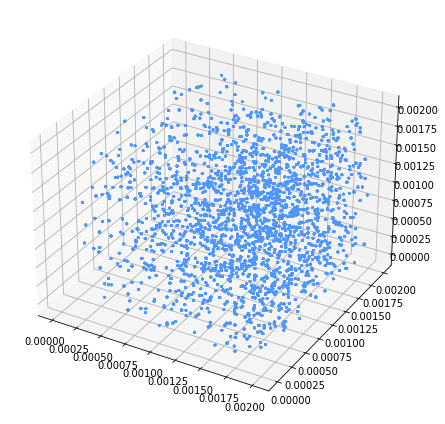

In [2]:
from snudda.plotting import PlotNetwork
network_file = os.path.join(network_path, "network-neuron-positions.hdf5")
pn = PlotNetwork(network_file)
pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False)
pn.close() 

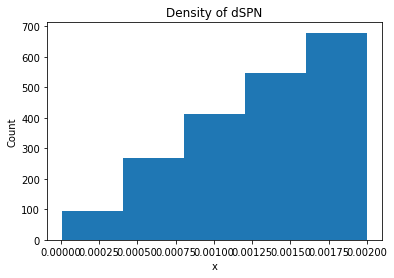

In [3]:
from snudda.plotting import PlotDensity
pd = PlotDensity(network_file)
pd.plot(neuron_type="dSPN", plot_axis="x")

## 